In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
df = pd.read_csv(r"C:\Users\hp\Desktop\chd_project\chd_data.csv")

In [3]:
# Display the first few rows of the dataset
print(df.head())

# Get information about the dataset
print(df.info())

# Summary statistics of numerical columns
print(df.describe())


   Gender  Age Is_Smoking  Cigarettes_per_Day BP_Meds Prevalent_Strokes  \
0    Male   40         No                   0      No                No   
1  Female   65        Yes                   5     Yes                No   
2    Male   55         No                   0      No               Yes   
3  Female   42        Yes                  12     Yes                No   
4    Male   58        Yes                  18     Yes               Yes   

  Prevalent_Hypertension Diabetes  Total_Cholesterol  Sys_BP  Dia_BP  BMI  \
0                     No       No                190     125      78   26   
1                    Yes      Yes                210     145      88   31   
2                    Yes       No                230     140      82   28   
3                     No      Yes                195     130      75   27   
4                    Yes      Yes                260     150      90   33   

   Heart_Rate  CHD  
0          70  NaN  
1          68  NaN  
2          75  NaN  
3 

In [10]:
df.dropna(inplace=True)

# Encode categorical variables (create dummy variables)
# Assuming 'Gender' and 'Is_Smoking' are columns in the dataset
if 'Gender' in df.columns and 'Is_Smoking' in df.columns:
    df = pd.get_dummies(df, columns=['Gender', 'Is_Smoking'])
else:
    print("Columns 'Gender' and/or 'Is_Smoking' not found in the dataset.")

# Scale numerical features (standardize numerical columns)
scaler = StandardScaler()
numerical_columns = ['Age', 'Total_Cholesterol', 'Sys_BP', 'Dia_BP', 'BMI', 'Heart_Rate']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display updated dataset
print("\nUpdated Dataset:")
print(df.head())

Columns 'Gender' and/or 'Is_Smoking' not found in the dataset.

Updated Dataset:
        Age  Cigarettes_per_Day BP_Meds Prevalent_Strokes  \
0 -1.078927                   0      No                No   
1  1.771896                   5     Yes                No   
2  0.631567                   0      No               Yes   
3 -0.850861                  12     Yes                No   
4  0.973665                  18     Yes               Yes   

  Prevalent_Hypertension Diabetes  Total_Cholesterol    Sys_BP    Dia_BP  \
0                     No       No          -1.148675 -1.145945 -0.880111   
1                    Yes      Yes          -0.311812  0.867201  0.502541   
2                    Yes       No           0.525051  0.363915 -0.327050   
3                     No      Yes          -0.939459 -0.642658 -1.294906   
4                    Yes      Yes           1.780345  1.370488  0.779071   

        BMI  Heart_Rate  Gender_Female  Gender_Male  Is_Smoking_No  \
0 -1.264023   -0.282990  

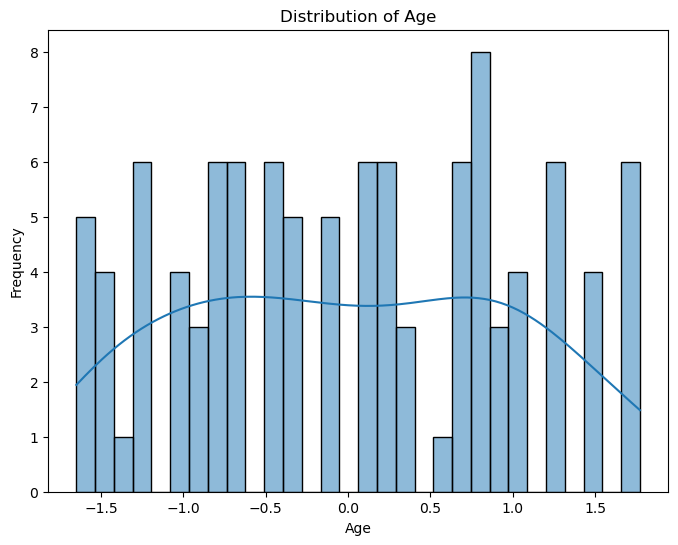

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example visualization: Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df.drop(columns=['CHD'])  # Assuming 'CHD' is the target variable
y = df['CHD']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


KeyError: "['CHD'] not found in axis"